# Optimization of Matrix Multiplication using Cython

## Overview

- We'll will start with a basic Python implementation of the matrix multiplication function then convert this function into Cython, which is a programming 
language that aims to combine the ease of Python and the speed of C.
- We'll apply various optimization techniques such as declaring variable types, using Cython compiler directives, and manipulating input data types.
- We'll measure the running time of our function and compare it. 

### Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

### Defining the Matrix Multiplication Function

In [2]:
def matrix_multiply(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [3]:
# Generating a random 10x10 matrix

u = np.random.rand(10, 10)
v = np.random.rand(10, 10)

## Step 1

### Comparison of Matrix Multiplication Function, the @ Operator, and np.matmul

In [4]:
print("Time taken by matrix_multiply function:")
time_matrix_multiply = %timeit -o -n 100 -r 3 matrix_multiply(u, v)

print("\nTime taken by @ operator:")
time_at_operator = %timeit -o -n 100 -r 3 u@v

print("\nTime taken by np.matmul:")
time_matmul = %timeit -o -n 100 -r 3 np.matmul(u, v)

Time taken by matrix_multiply function:
570 µs ± 5.01 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)

Time taken by @ operator:
2.34 µs ± 737 ns per loop (mean ± std. dev. of 3 runs, 100 loops each)

Time taken by np.matmul:
1.93 µs ± 153 ns per loop (mean ± std. dev. of 3 runs, 100 loops each)


### Estimating FLOPS (in GFLOPS - $10^9$)

In [5]:
m, n = u.shape
n, p = v.shape
total_multiplications = m * n * p
total_operations = 2 * total_multiplications

In [6]:
flops_matrix_multiply = total_operations / (time_matrix_multiply.best)
flops_at_operator = total_operations / (time_at_operator.best)
flops_matmul = total_operations / (time_matmul.best)

print(f"\nFLOPS achieved by matrix_multiply function: {flops_matrix_multiply / 1e9:.3f} GFLOPS")
print(f"FLOPS achieved by @ operator: {flops_at_operator / 1e9:.3f} GFLOPS")
print(f"FLOPS achieved by np.matmul: {flops_matmul / 1e9:.3f} GFLOPS")



FLOPS achieved by matrix_multiply function: 0.004 GFLOPS
FLOPS achieved by @ operator: 1.101 GFLOPS
FLOPS achieved by np.matmul: 1.098 GFLOPS


Based on the results we got, it’s clear that the built-in matrix multiplication functions in NumPy (`@` operator and `np.matmul`) are significantly more efficient than the manual implementation (`matrix_multiply` function).

## Step 2

### Estimating the maximum FLOPS

Assuming that the CPU can perform either one addition or multiplication per clock cycle, then if the CPU frequency is `f` GHz, then the maximum FLOPS is also `f` GFLOPS because each clock cycle can perform one floating point operation.
So in our case, CPU’s maximum operating frequency is 2.1 GHz, then it could achieve a maximum of 2.1 GFLOPS on a single core.

Our observations indicate that the GFLOPS obtained through Python’s inherent matrix multiplication functions (`@` operator and `np.matmul`) fall short when compared to the potential maximum GFLOPS of our CPU for smaller matrices. This can be attributed to Python being an interpreted language, which inherently carries a substantial overhead during the execution of loops and arithmetic operations. Conversely, languages that operate at a lower level, such as C and Fortran, are utilized in the creation of libraries like NumPy, enabling them to reach GFLOPS values that are closer to the theoretical maximum.

## Step 3

### Performance Comparison with Increasing Matrix sizes

Running for matrix size 10x10
594 µs ± 55.7 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
The slowest run took 4.25 times longer than the fastest. This could mean that an intermediate result is being cached.
4.25 µs ± 3.11 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
Running for matrix size 20x20
4.37 ms ± 149 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
6.16 µs ± 2.93 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
Running for matrix size 40x40
34.8 ms ± 273 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
The slowest run took 7.32 times longer than the fastest. This could mean that an intermediate result is being cached.
55.6 µs ± 53.3 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
Running for matrix size 80x80
279 ms ± 4.64 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)
The slowest run took 34.39 times longer than the fastest. This could mean that an intermediate result is being cached.
2.2 ms ± 2.81 ms per loop (mean ± std. 

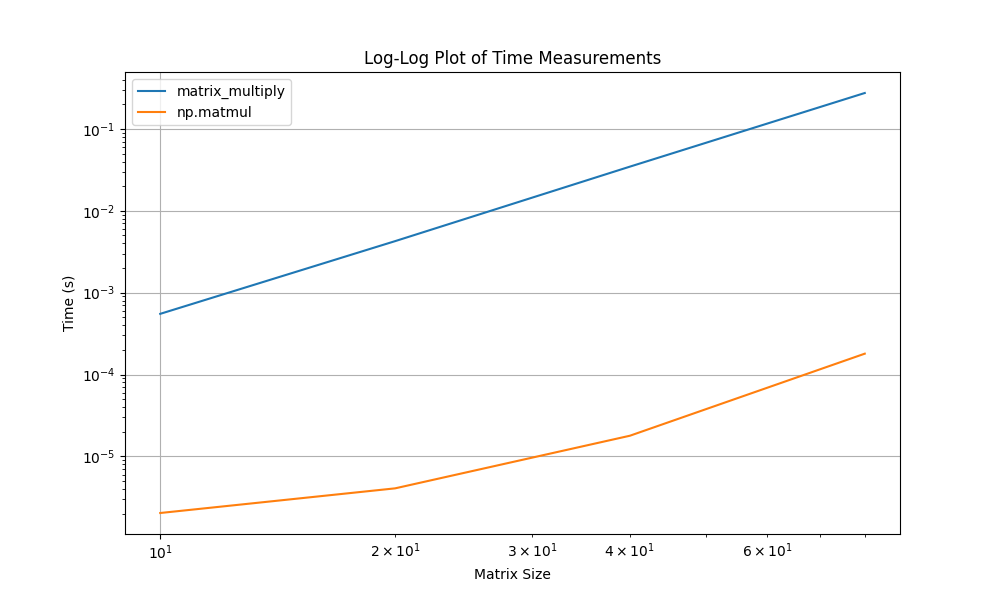

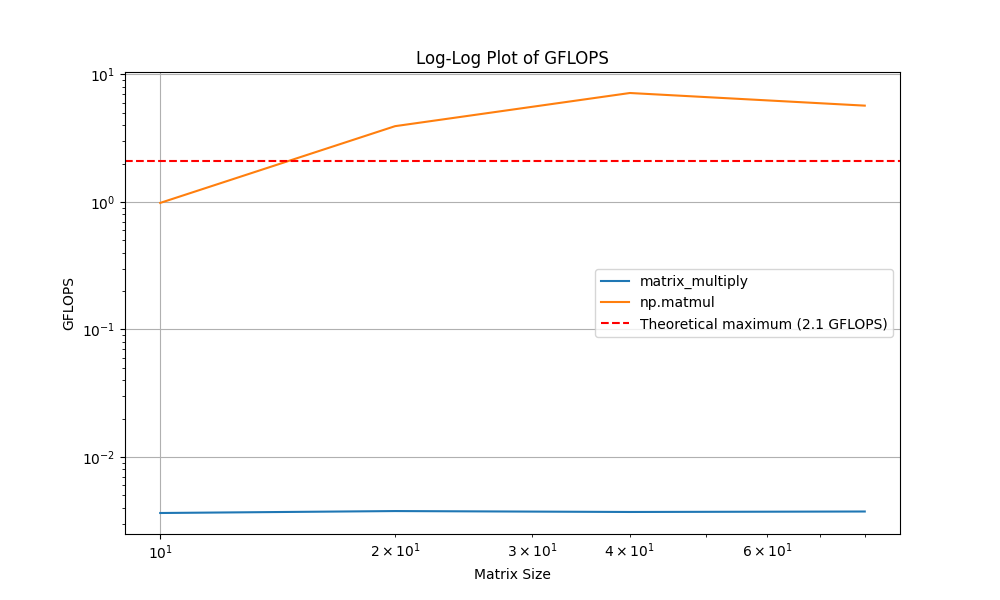

In [7]:
size = 10
sizes = []
times_matrix_multiply = []
times_matmul = []

# Repeat the process, doubling the size of the matrices for each run
while size <= 80:  # Adjust this condition based on your system's capabilities
    print(f"Running for matrix size {size}x{size}")

    # Generate two matrices with random entries for testing
    u = np.random.rand(size, size)
    v = np.random.rand(size, size)

    # Time the matrix_multiply function and the @ operator using %timeit
    time_matrix_multiply = %timeit -o -n 3 -r 3 matrix_multiply(u, v)
    times_matrix_multiply.append(time_matrix_multiply.best)
    time_matmul = %timeit -o -n 3 -r 3 np.matmul(u, v)
    times_matmul.append(time_matmul.best)
    sizes.append(size)

    # Double the size for the next run
    size *= 2
total_operations = [2 * n**3 for n in sizes]
gflops_matrix_multiply = [ops / time / 1e9 for ops, time in zip(total_operations, times_matrix_multiply)]
gflops_matmul = [ops / time / 1e9 if time is not None else None for ops, time in zip(total_operations, times_matmul)]


# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(sizes, times_matrix_multiply, label='matrix_multiply')
plt.loglog(sizes, times_matmul, label='np.matmul')  # Exclude None values
plt.xlabel('Matrix Size')
plt.ylabel('Time (s)')
plt.legend()
plt.grid(True)
plt.title('Log-Log Plot of Time Measurements')
plt.show()

# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(sizes, gflops_matrix_multiply, label='matrix_multiply')
plt.loglog(sizes, [g for g in gflops_matmul if g is not None], label='np.matmul')
plt.axhline(2.1, color='r', linestyle='--', label='Theoretical maximum (2.1 GFLOPS)')
plt.xlabel('Matrix Size')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.title('Log-Log Plot of GFLOPS')
plt.show()

In [8]:
import time

def find_max_size():
    size = 100  # Start with a small size
    while True:
        # Create random matrices of the current size
        u = np.random.rand(size, size)
        v = np.random.rand(size, size)

        # Time the matrix multiplication
        start = time.time()
        np.matmul(u, v)
        end = time.time()

        # If the computation took more than 1 second, return the current size
        if end - start > 1:
            return size

        # Otherwise, increase the size for the next iteration
        size += 100

max_size = find_max_size()
print(f"The maximum order of the matrix that numpy matmul can run under 1 second is around {max_size}x{max_size}.")


The maximum order of the matrix that numpy matmul can run under 1 second is around 3000x3000.


### Observation

- From this, we can observe that as we increase the size of the matrices, the time taken by our manual implementation (`matrix_multiply`) 
increases much more rapidly than that taken by Python’s built-in matrix multiplication functions (`np.matmul`).
- It is comparitively taking more time for matrix size 160, so we are stopping at 80.
- We can observe that `np.matmul` has a higher GFLOPS measurement than `matrix_multiply`, especially for larger matrices.
- NumPy functions, including `np.matmul`, are highly optimized and can often achieve higher GFLOPS.
- Its because NumPy functions are implemented in C and make use of highly optimized libraries like BLAS (Basic Linear Algebra Subprograms) and LAPACK (Linear Algebra Package), which are written in Fortran2.


## Step 4

### Cython Implementation

In [9]:
%load_ext Cython

In [10]:
%%cython --annotate
import numpy as np

def matrix_multiply_cy(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [11]:
u = np.random.random((50, 50))
v = np.random.random((50, 50))

In [12]:
%timeit -n 100 -r 3 matrix_multiply_cy(u, v)

56.7 ms ± 2.04 ms per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [13]:
%timeit -n 100 -r 3 matrix_multiply(u, v)

67 ms ± 1.72 ms per loop (mean ± std. dev. of 3 runs, 100 loops each)


### Observation: 

Even without any specific optimizations, by simply compiling the Python code with Cython, we can see some speed improvements. This function is generally more efficient than the original Python version. It's because Cython translates our Python code into C, which is then compiled to machine code and can run more efficiently than interpreted Python code.

## Step 5

### Optimizing the Cython code

### Declare each of the variables i, j, k, m, n, p as int types

In [14]:
%%cython --annotate
import numpy as np

def matmul_cy_opt_1(u,v):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

### Using the decorator function `@cython.boundscheck(False)`

In [15]:
%%cython --annotate
import numpy as np
import cython

@cython.boundscheck(False)
def matmul_cy_opt_2(u, v):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

### Declaring the input variables to be of type double[:, :]

In [16]:
%%cython --annotate
import numpy as np
import cython

@cython.boundscheck(False)
def matmul_cy_opt_3(double[:,:] u, double[:,:] v):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

### Declaring the output variables also to be of type double[:, :]

In [17]:
%%cython --annotate
import numpy as np
import cython

@cython.boundscheck(False)
def matmul_cy_opt_4(double[:,:] u, double[:,:] v, double[:,:] res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]

    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

### Changing the data type to float[:,:]

In [18]:
%%cython --annotate
import numpy as np
import cython

@cython.boundscheck(False)
def matmul_cy_opt_5(float[:,:] u, float[:,:] v, float[:,:] res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]

    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

### Observation

In [19]:
u = np.random.random((10, 10))
v = np.random.random((10, 10))
print("Time for each parts of the optimization :")

Time for each parts of the optimization :


In [20]:
print("Part 1 : ",end="")
%timeit -n 100 -r 3 matmul_cy_opt_1(u, v)
print("\nPart 2 : ",end="")
%timeit -n 100 -r 3 matmul_cy_opt_2(u, v)
print("\nPart 3 : ",end="")
%timeit -n 100 -r 3 matmul_cy_opt_3(u, v)
res = np.zeros((u.shape[0], v.shape[1]))
print("\nPart 4 : ",end="")
%timeit -n 100 -r 3 matmul_cy_opt_4(u, v, res)
u = np.random.random((10, 10)).astype(np.float32)
v = np.random.random((10, 10)).astype(np.float32)
res = np.zeros((u.shape[0], v.shape[1]), dtype=np.float32)
print("\nPart 5 : ",end="")
%timeit -n 100 -r 3 matmul_cy_opt_5(u, v, res)

Part 1 : 461 µs ± 20 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)

Part 2 : 458 µs ± 3.59 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)

Part 3 : 241 µs ± 1.71 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)

Part 4 : 2.3 µs ± 424 ns per loop (mean ± std. dev. of 3 runs, 100 loops each)

Part 5 : 1.98 µs ± 235 ns per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [21]:
%timeit -n 100 -r 3 u@v

2.34 µs ± 597 ns per loop (mean ± std. dev. of 3 runs, 100 loops each)


- Declaring the types of variables in Cython allows it to generate more efficient C code by bypassing Python’s dynamic typing system. This can lead to significant speed improvements.
- **Using the decorator function `@cython.boundscheck(False)`** : This decorator disables bounds checking for indexing operations in Cython. Bounds checking can slow down your code because it involves extra safety checks every time an element of an array is accessed. Disabling it can speed up your code, but need to be careful not to index outside the bounds of your arrays.
- The change of the data type of the input arrays to double precision floating point numbers as variables of Cython can increase the accuracy of our calculations and result in significant speed improvements.
- Declaring `res` also as the argument of the function allows to reuse the same output array for multiple calls to the function, which can save memory and improve performance. However, you need to ensure that res is initialized to a zero array before calling the function.
- The change of the data type to single precision floating point numbers uses less memory than double precision numbers and can be faster on some hardware, but it may reduce the accuracy of your calculations. 

### Result

- The last process and the one before it were the more optimized ones.
- In Cython, declaring the variable types allows the compiler to generate more efficient C code. When you declare res also to be an argument to the function of `double[:,:]` or `float[:,:]` type, you’re allowing Cython to handle it more efficiently because it knows exactly what kind of object res is.
- Moreover, by ensuring that res is initialized to a zero array before calling the function, you’re avoiding the overhead of array initialization within the function. This can be particularly beneficial when the function is called multiple times, as it prevents unnecessary array initializations.

## Conclusion

- We explored the process of optimizing a matrix multiplication function using Cython.
- We started with a basic Python implementation and incrementally applied various optimization techniques, observing the impact on performance at each step.
- We compared the performance of our optimized function with NumPy’s built-in `u@v` function. While `u@v` generally performed better due to its highly optimized nature, our Cython function showed significant improvement over the original Python implementation.